## Dataset
Our data are from the author: 
https://www.kaggle.com/rahulanand0070/youtubevideodataset

# Classification

## Step1: Process data

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

### 1 read and simply process

In [2]:
#1. read and loc datas
data = pd.read_csv('E:/1 Research/AI4ALL/Project/Advertisement-Recommendation/Data/Youtube Video Dataset.csv')
#vdata = data.iloc[:, 1:] 
#2. drop NA
vdata = data.dropna()
vdata.head()

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


### 2 text process
process the meaning content: Title and description

In [3]:
# 1.Change to lowercase
vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
vdata['Description'] = vdata['Description'].map(lambda x: x.lower())

# 2.Remove numbers: re.sub
vdata['Title'] = vdata['Title'].map(lambda x: re.sub(r'\d+', '', x))
vdata['Description'] = vdata['Description'].map(lambda x: re.sub(r'\d+', '', x))

# 3.Remove Punctuation: x.translate(x.maketrans('', '', string.punctuation))
vdata['Title']  = vdata['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
vdata['Description']  = vdata['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# 4.Remove white spaces: x.strip()
vdata['Title'] = vdata['Title'].map(lambda x: x.strip())
vdata['Description'] = vdata['Description'].map(lambda x: x.strip())

'''Tokenize, stopwords'''
# 5. Tokenize into words: word_tokenize(x)
vdata['Title'] = vdata['Title'].map(lambda x: word_tokenize(x))
vdata['Description'] = vdata['Description'].map(lambda x: word_tokenize(x))
 
# 6. Remove non alphabetic tokens: word.isalpha()
vdata['Title'] = vdata['Title'].map(lambda x: [word for word in x if word.isalpha()])
vdata['Description'] = vdata['Description'].map(lambda x: [word for word in x if word.isalpha()])

# 7. filter out stop words: stop_words = set(stopwords.words('english'))[genetare stopwords]
stop_words = set(stopwords.words('english'))
vdata['Title'] = vdata['Title'].map(lambda x: [w for w in x if not w in stop_words])
vdata['Description'] = vdata['Description'].map(lambda x: [w for w in x if not w in stop_words])

# 8. Word Lemmatization: remove times and tense [lem.lemmatize(word,"v") for word in x]
lem = WordNetLemmatizer()
vdata['Title'] = vdata['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
vdata['Description'] = vdata['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# 9. Turn lists back to string:  ' '.join(x) [combine them together]
vdata['Title'] = vdata['Title'].map(lambda x: ' '.join(x))
vdata['Description'] = vdata['Description'].map(lambda x: ' '.join(x))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9312\3503758100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdata['Title'] = vdata['Title'].map(lambda x: x.lower())
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9312\3503758100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdata['Description'] = vdata['Description'].map(lambda x: x.lower())
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9312\3503758100.py:6: SettingWithCopyWarning: 
A value is trying to be

### 3 Label encoding classes
replace each category with number 

In [4]:
from sklearn.preprocessing import LabelEncoder
#build encoder
le = LabelEncoder()
le.fit(vdata.Category)
#encode
vdata.Category = le.transform(vdata.Category)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9312\326662519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vdata.Category = le.transform(vdata.Category)


In [7]:
#vdata.head()

### 4 vectorizing text features using TF-IDF 
vectorize title and description

In [5]:
# TF-IDF 
# TODO: what is TfidfVectorizer, encoding, n_gram
from sklearn.feature_extraction.text import TfidfVectorizer

#S1: build transformer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = vdata.Category#get category of each video; Is labels used here?

#S2: take in data
features_title = tfidf_title.fit_transform(vdata.Title).toarray()
features_description = tfidf_desc.fit_transform(vdata.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (11128, 2946)
Description Features Shape: (11128, 31786)


## Step2: Data Analysis

In [8]:
import matplotlib.pyplot as plt
import numpy as np

### 1. sort by frequency

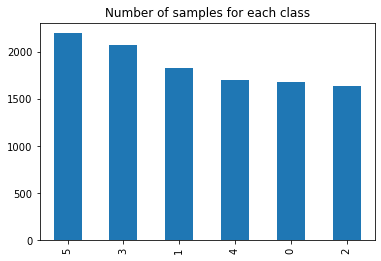

In [10]:

vdata['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', 
                                                                title='Number of samples for each class')
plt.savefig("sort_by_fre2.jpg")

### 2.find best 3 key words
checking the most important features for each class

#### a Title 

In [11]:
from sklearn.feature_selection import chi2
import numpy as np

N = 3 #number of keywords
for current_class in list(le.classes_):#walk through each kind of class in le
    # transfrom: turn it into number, get 1st ?
    current_class_id = le.transform([current_class])[0] 
    
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])#get 1st one indices?
    
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Art&Music':
Most correlated unigrams:
------------------------------
. paint
. music
. art
Most correlated bigrams:
------------------------------
. music video
. music art
. art music


# 'Food':
Most correlated unigrams:
------------------------------
. world
. street
. food
Most correlated bigrams:
------------------------------
. food tour
. food world
. street food


# 'History':
Most correlated unigrams:
------------------------------
. ancient
. religion
. history
Most correlated bigrams:
------------------------------
. crash course
. history religion
. indian history


# 'Science&Technology':
Most correlated unigrams:
------------------------------
. brain
. technology
. science
Most correlated bigrams:
------------------------------
. food science
. university science
. science technology


# 'manufacturing':
Most correlated unigrams:
------------------------------
. textile
. process
. manufacture
Most correlated bigrams:
------------------------------
. manufacture servi

#### b Description

In [12]:

for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Art&Music':
Most correlated unigrams:
------------------------------
. music
. paint
. art
Most correlated bigrams:
------------------------------
. music education
. music art
. art music


# 'Food':
Most correlated unigrams:
------------------------------
. httpinstagrammikexingchen
. street
. food
Most correlated bigrams:
------------------------------
. facebook mike
. instagram httpinstagrammikexingchen
. street food


# 'History':
Most correlated unigrams:
------------------------------
. ancient
. religion
. history
Most correlated bigrams:
------------------------------
. world history
. crash course
. indian history


# 'Science&Technology':
Most correlated unigrams:
------------------------------
. technology
. science
. seeker
Most correlated bigrams:
------------------------------
. newsletter httpbitlyuopxi
. mitchell moffit
. science technology


# 'manufacturing':
Most correlated unigrams:
------------------------------
. textile
. factory
. manufacture
Most correlate

## Step3: Model and train

### 1 Pre_trained models

#### a make dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
# random_state: int to seed
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, [0,3]], vdata['Category'], random_state = 0)

X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

#### b make model

In [17]:
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)
# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=40,algorithm="SAMME").fit(features,y_train)

In [15]:
# Ridge
ri = linear_model.RidgeClassifier(alpha = 0.1, max_iter=1000, tol=1e-3).fit(features,y_train)

In [17]:
# Regression
re = linear_model.LogisticRegression(max_iter=1000, tol=1e-3).fit(features,y_train)

### 2 Self-make CNN

#### a basic setting

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
'''
what is the model?
what are new layers?
'''
'''1. Number value'''
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.TODO: try 100?
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

'''2. lstm'''
# Combining titles and descriptions into a single sentence
titles = vdata['Title'].values
descriptions = vdata['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
# PS: Turn it into matrix, use 0 for blank entry
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
# PS: what does get_dummies do: Convert Series to dummy codes.
Y = pd.get_dummies(vdata['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 104234 unique tokens.
Shape of data tensor: (11128, 50)
Shape of label tensor: (11128, 6)


#### b build layer

In [19]:
# Define LSTM Model
model = Sequential()
#input_dim=10,output_dim=4,input_length=2
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))#drop total something
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2,081,006
Trainable params: 2,081,006
Non-trainable params: 0
_________________________________________________________________
None


#### c training

In [20]:
# Training LSTM Model
epochs = 5
batch_size = 32
#validation_split: The model will set apart this fraction of the training data, 
#will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
235/235 [==============================] - 77s 292ms/step - loss: 0.9575 - accuracy: 0.6459 - val_loss: 0.4114 - val_accuracy: 0.8886
Epoch 2/5
235/235 [==============================] - 62s 264ms/step - loss: 0.3008 - accuracy: 0.9208 - val_loss: 0.3743 - val_accuracy: 0.8934
Epoch 3/5
235/235 [==============================] - 59s 251ms/step - loss: 0.1654 - accuracy: 0.9581 - val_loss: 0.2886 - val_accuracy: 0.9198
Epoch 4/5
235/235 [==============================] - 63s 269ms/step - loss: 0.1119 - accuracy: 0.9711 - val_loss: 0.3720 - val_accuracy: 0.9078
Epoch 5/5
235/235 [==============================] - 61s 261ms/step - loss: 0.0934 - accuracy: 0.9758 - val_loss: 0.3787 - val_accuracy: 0.9066


#### d visualize result

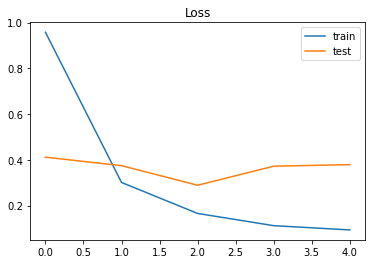

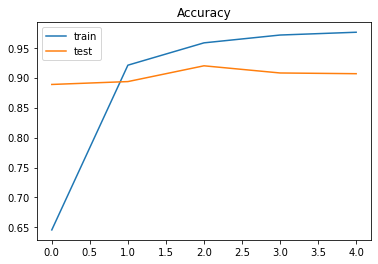

<Figure size 432x288 with 0 Axes>

In [21]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.savefig("2model_loss.jpg")

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
plt.savefig("2model_accuracy.jpg")

## Step 4: Compare performance

### 1. for pre_trained

In [11]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [12]:
X_train, X_test, y_train, y_test = train_test_split(vdata.iloc[:, [0, 3]], vdata['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

#### 0.1 Ridge
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

                    precision    recall  f1-score   support

         Art&Music       0.98      0.97      0.98       421
              Food       0.97      0.97      0.97       435
           History       0.97      0.99      0.98       405
Science&Technology       0.99      0.98      0.99       549
     manufacturing       0.97      0.97      0.97       423
       travel blog       0.96      0.97      0.96       549

          accuracy                           0.97      2782
         macro avg       0.97      0.97      0.97      2782
      weighted avg       0.97      0.97      0.97      2782



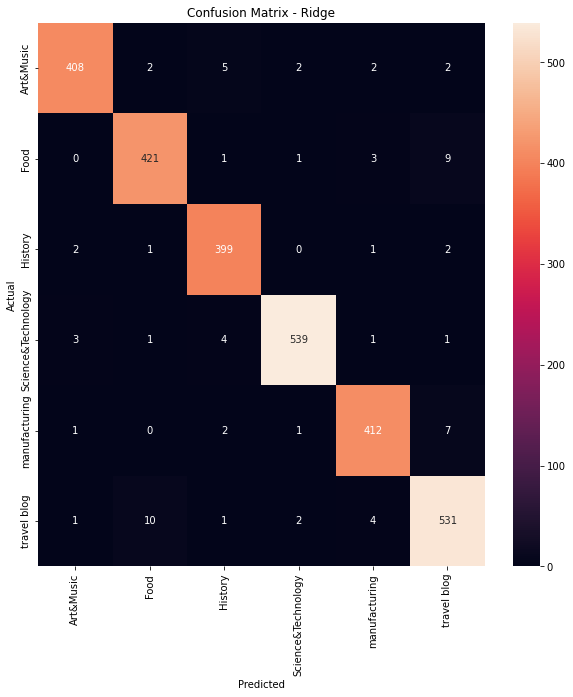

'\n# 3. print Curve\nskplt.metrics.plot_precision_recall(y_test, y_probas)\nplt.title(\'Precision-Recall Curve - Lasso\')\nplt.savefig("2LA_prerecall.jpg")\nplt.show()\n'

In [16]:
# predict
y_pred = ri.predict(test_features)
#y_probas = la.predict_proba(test_features)

# 1. print form: metrics.classification_report
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

# 2. print matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Ridge')
plt.savefig("2RI_matrix.jpg")
plt.show()

'''
# 3. print Curve
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Lasso')
plt.savefig("2LA_prerecall.jpg")
plt.show()
'''


#### 0.2 LogisticRegression

                    precision    recall  f1-score   support

         Art&Music       0.99      0.99      0.99       421
              Food       0.97      0.98      0.97       435
           History       0.99      0.99      0.99       405
Science&Technology       0.99      0.99      0.99       549
     manufacturing       0.99      0.99      0.99       423
       travel blog       0.97      0.97      0.97       549

          accuracy                           0.98      2782
         macro avg       0.98      0.98      0.98      2782
      weighted avg       0.98      0.98      0.98      2782



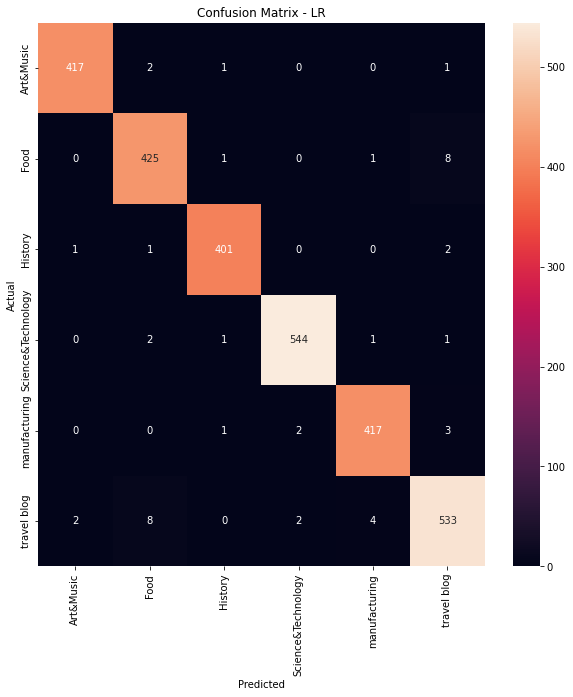

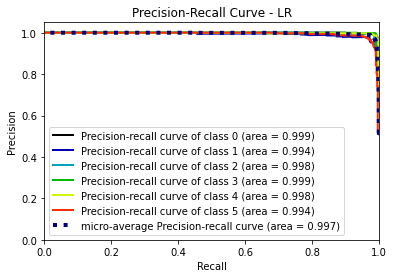

In [18]:
# predict
y_pred = re.predict(test_features)
y_probas = re.predict_proba(test_features)

# 1. print form: metrics.classification_report
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

# 2. print matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LR')
plt.savefig("2LR_matrix.jpg")
plt.show()

# 3. print Curve
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - LR')
plt.savefig("2LR_prerecall.jpg")
plt.show()

#### a NB

                    precision    recall  f1-score   support

         Art&Music       0.98      0.97      0.97       421
              Food       0.96      0.93      0.95       435
           History       0.94      0.96      0.95       405
Science&Technology       0.96      0.99      0.97       549
     manufacturing       0.99      0.96      0.97       423
       travel blog       0.96      0.97      0.96       549

          accuracy                           0.96      2782
         macro avg       0.97      0.96      0.96      2782
      weighted avg       0.97      0.96      0.96      2782



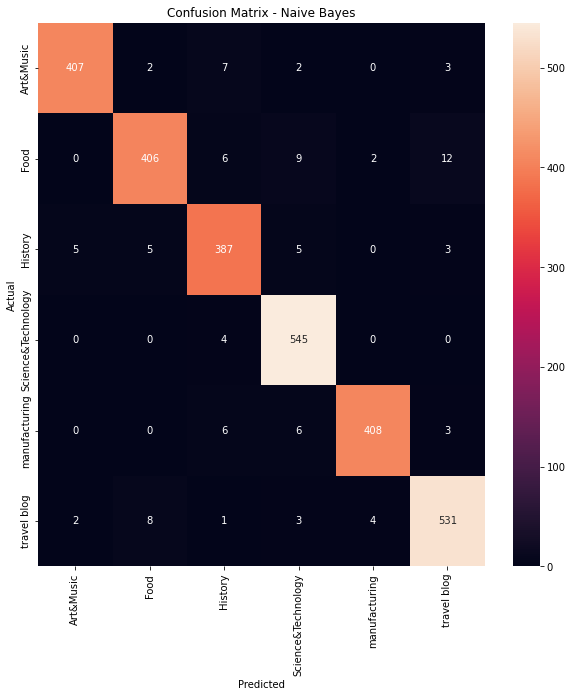

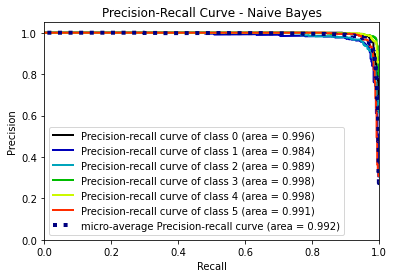

In [26]:
# predict
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

# 1. print form: metrics.classification_report
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

# 2. print matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.savefig("2NB_matrix.jpg")
plt.show()


# 3. print Curve
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.savefig("2NB_prerecall.jpg")
plt.show()


#### b SVM

                    precision    recall  f1-score   support

         Art&Music       0.98      0.99      0.99       421
              Food       0.96      0.98      0.97       435
           History       0.98      0.99      0.99       405
Science&Technology       0.99      0.99      0.99       549
     manufacturing       0.99      0.99      0.99       423
       travel blog       0.98      0.96      0.97       549

          accuracy                           0.98      2782
         macro avg       0.98      0.98      0.98      2782
      weighted avg       0.98      0.98      0.98      2782



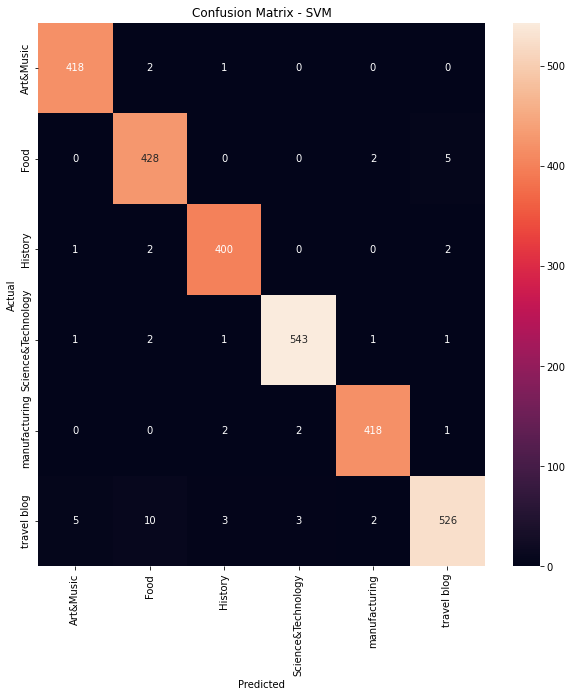

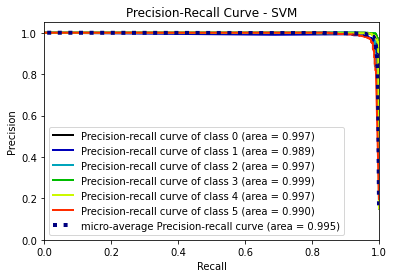

In [27]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.savefig("2SVM_matrix.jpg")
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.savefig("2SVM_prerecall.jpg")
plt.show()

### c Adaboost Classier

                    precision    recall  f1-score   support

         Art&Music       0.99      0.89      0.94       421
              Food       0.84      0.81      0.83       435
           History       0.99      0.76      0.86       405
Science&Technology       0.98      0.87      0.92       549
     manufacturing       0.99      0.70      0.82       423
       travel blog       0.58      0.93      0.72       549

          accuracy                           0.84      2782
         macro avg       0.89      0.83      0.85      2782
      weighted avg       0.88      0.84      0.84      2782



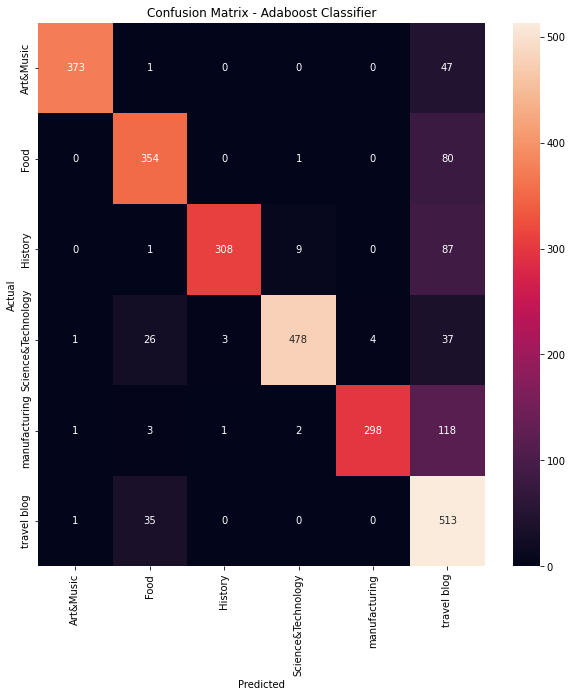

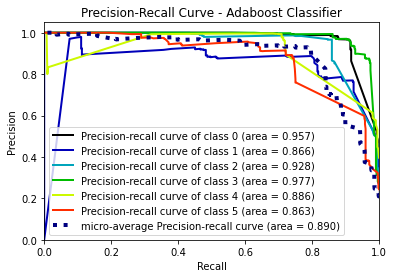

In [28]:
# Adaboost Classifier
y_pred = adaboost.predict(test_features)
y_probas = adaboost.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Adaboost Classifier')
plt.savefig("2Ada_matrix.jpg")
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - Adaboost Classifier')
plt.savefig("2Ada_prerecall.jpg")
plt.show()

### 2. for self_defined

87/87 [==============================] - 5s 38ms/step
                    precision    recall  f1-score   support

         Art&Music       0.90      0.86      0.88       413
              Food       0.95      0.89      0.92       470
           History       0.83      0.92      0.87       415
Science&Technology       0.90      0.94      0.92       515
     manufacturing       0.95      0.89      0.92       421
       travel blog       0.91      0.92      0.91       548

          accuracy                           0.91      2782
         macro avg       0.91      0.90      0.90      2782
      weighted avg       0.91      0.91      0.91      2782



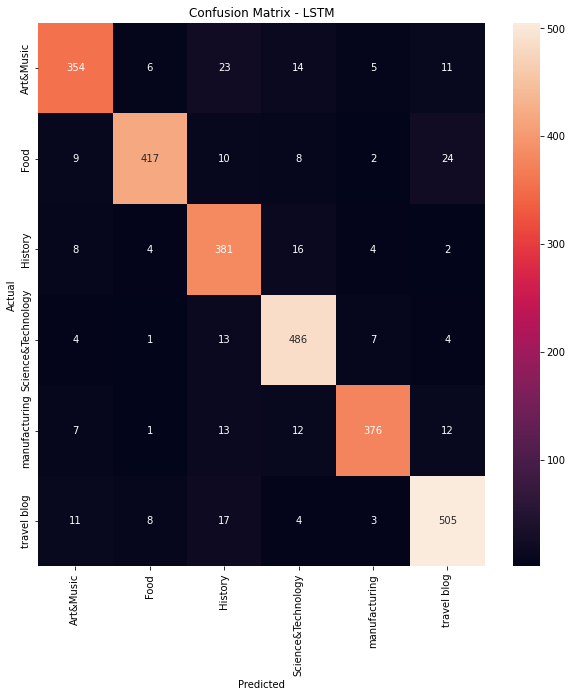

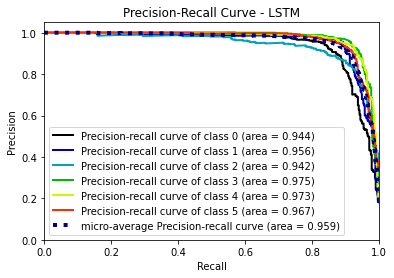

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.savefig("2LSTM_matrix.jpg")
plt.show()

skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.savefig("2LSTM_prerecall.jpg")
plt.show()

# Prediction

## S1: import 

In [22]:
adata = pd.read_csv('E:/1 Research/AI4ALL/Project/Advertisement-Recommendation/Data/collected_sports_data.csv' )
#delete columns which are not required
adata.drop(adata.iloc[:, 4:42], inplace = True, axis = 1) 

## S2: process and clean

In [23]:
# Change to lowercase
adata['Title 1'] = adata['Title 1'].map(lambda x: x.lower())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.lower())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.lower())

# Remove Punctuation
adata['Title 1'] = adata['Title 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
adata['H1-1'] = adata['H1-1'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
adata['Title 1'] = adata['Title 1'].map(lambda x: x.strip())
adata['Meta Description 1'] = adata['Meta Description 1'].map(lambda x: x.strip())
adata['H1-1'] = adata['H1-1'].map(lambda x: x.strip())

## S3: Select based on keyword

In [24]:
import pandas as pd
def find(dec,k):
    r=[]
    for i in dec.index:
        if k in dec['Meta Description 1'][i]:
            r.append(dec['Original Url'][i])
    return r


# Import Data
#adata = pd.read_csv('collected_sports_data.csv' )
adata=adata[['Original Url', 'Meta Description 1']]

#Search unigram keyword which is extracted from videos data.
# find unigram keyword
result=find(adata, "food") 
for i in result:
    print(" Url Link ",i)

 Url Link  https://www.adforum.com/creative-work/ad/player/12661308/yaos-comfort-food/t-mobile
 Url Link  https://www.adforum.com/creative-work/ad/player/34464346/a-lemonade-at-lunch/nyc-health
 Url Link  https://www.adforum.com/creative-work/ad/player/34464347/are-you-pouring-on-the-pounds/nyc-health
 Url Link  https://www.adforum.com/creative-work/ad/player/34464348/youd-never-eat/nyc-health
 Url Link  https://www.adforum.com/creative-work/ad/player/34506119/epic-food-drogba-vs-messi/turkish-airlines
 Url Link  https://www.adforum.com/creative-work/ad/player/34513909/805-million-names-case-study/world-food-programme
 Url Link  https://www.adforum.com/creative-work/ad/player/34515038/skinny-jeans/food-and-drug-administration
 Url Link  https://www.adforum.com/creative-work/ad/player/34525148/oatly/oatly
 Url Link  https://www.adforum.com/creative-work/ad/player/34562857/first-generation-that-might-have-a-shorter-lifespan-than-their-parents/sound-food-uprising
 Url Link  https://www.ad

# What can we do in the future?

1. Explore other forms of recommendation system
2. apply the algorithm to other datasets
3. modify the layer of self-implemented models to receive better result

# Why choose this?

1. recommendation system has bias